## Project: Traffiic collision analysis 
This project aims at building a machine learning classfication model in oder to predict whether the person just fatal or non fatal injury in a collsion based on various features.the datset used in this project is from kaggle

The claffication model which are used in this project are evaluated on the basis of classification report and accuarcy score to know which model is performing best.

the classifaction model which will be be used are Random Forest classifier,Gradient boosting Classifier,SVM amd logistic regression.Then the results from all these model are saved in csv file and then uploaded to competion to know whether the model are underfiting or overfiting.

### Libraries importing:
in this will bw importing the libraries which are nesccesary for our project in order to prediction.The libraries that will be used are Numpy,pandas, sklearn,matplotlib, seaborn etc

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import learning_curve


In this the datset is loaded using pandas function(pd.read_csv) and information is loaded into variable

In [139]:
# loading dataset
train_df=pd.read_csv("model assignment 2/train.csv")
test_df=pd.read_csv("model assignment 2/test.csv")

In this copy of test datset is made using (copy) function in oder use the object id make comparison and check the overfiting nad underfiting of models

In [140]:
# creating copy for accesing object id from this
object_id_col = test_df.copy()
object_id_col.head()

,X,Y,OBJECTID,INDEX_,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION
0,637398.2785,4849101.813,15001,80972086,NaN,2018/09/26 08:00:00+00,2053,3850 SHEPPARD AVE E,NaN,90 m East of,...,NaN,Yes,NaN,NaN,NaN,118,Tam O'Shanter-Sullivan,118,Tam O'Shanter-Sullivan (118),D42
1,637398.2785,4849101.813,15002,80972617,NaN,2018/09/26 08:00:00+00,2053,3850 SHEPPARD AVE E,NaN,90 m East of,...,NaN,Yes,NaN,NaN,NaN,118,Tam O'Shanter-Sullivan,118,Tam O'Shanter-Sullivan (118),D42
2,639017.8028,4843417.954,15003,80972182,NaN,2018/09/28 08:00:00+00,806,EGLINTON AVE E,ROSEMOUNT DR,NaN,...,NaN,NaN,NaN,NaN,NaN,125,Ionview,125,Ionview (125),D41
3,639017.8028,4843417.954,15004,80972183,NaN,2018/09/28 08:00:00+00,806,EGLINTON AVE E,ROSEMOUNT DR,NaN,...,NaN,NaN,NaN,NaN,NaN,125,Ionview,125,Ionview (125),D41
4,620810.2466,4838690.153,15005,80972485,NaN,2018/09/28 08:00:00+00,1018,1277 JANE ST,NaN,4 m North of,...,NaN,NaN,NaN,NaN,NaN,115,Mount Dennis,115,Mount Dennis (115),D12


In his step we will using some function like head ,info to get insights of our datasets.

In [141]:
train_df.head()

,X,Y,OBJECTID,INDEX_,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION
0,635468.3685,4839880.764,1,3389067,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
1,635468.3685,4839880.764,2,3389068,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
2,635468.3685,4839880.764,3,3389069,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
3,635468.3685,4839880.764,4,3389070,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
4,635468.3685,4839880.764,5,3389071,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55


In [142]:
#information of dataset such as howmany no null value , datatypes of columns , number of raws and columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  15000 non-null  float64
 1   Y                  15000 non-null  float64
 2   OBJECTID           15000 non-null  int64  
 3   INDEX_             15000 non-null  int64  
 4   ACCNUM             11302 non-null  float64
 5   DATE               15000 non-null  object 
 6   TIME               15000 non-null  int64  
 7   STREET1            15000 non-null  object 
 8   STREET2            13657 non-null  object 
 9   OFFSET             1928 non-null   object 
 10  ROAD_CLASS         14643 non-null  object 
 11  DISTRICT           14984 non-null  object 
 12  LATITUDE           15000 non-null  float64
 13  LONGITUDE          15000 non-null  float64
 14  ACCLOC             9550 non-null   object 
 15  TRAFFCTL           14971 non-null  object 
 16  VISIBILITY         149

In this we are making a function that will tell us about all the unique values in our datset and printing it 

In [1]:
#created function for printing unique value from all column
def count_func():
    count= 0
    for column in train_df.columns:# loop which call each column one by one
        unique_value= train_df[column].unique() # getting unique value in each column
        unique_number= train_df[column].nunique() # getting number of unique value in each column
        count+=1
        print(f"{count}. unique value in {column}: {unique_value} \n")  # print the unique value
        print(f"{count}. unique value number in {column} : {unique_number} \n") # print the number of unique values

In [ ]:
count_func()

In [ ]:
# number of raws and columns
train_df.shape

(15000, 54)

We are using isnull function in order to know about the null values in the dataset

In [146]:
# number of null value in all column using isnill function
print(train_df.isnull().sum())

X                        0
Y                        0
OBJECTID                 0
INDEX_                   0
ACCNUM                3698
DATE                     0
TIME                     0
STREET1                  0
STREET2               1343
OFFSET               13072
ROAD_CLASS             357
DISTRICT                16
LATITUDE                 0
LONGITUDE                0
ACCLOC                5450
TRAFFCTL                29
VISIBILITY              14
LIGHT                    0
RDSFCOND                19
ACCLASS                  0
IMPACTYPE                0
INVTYPE                 10
INVAGE                   0
INJURY                7189
FATAL_NO             14407
INITDIR               4498
VEHTYPE               2056
MANOEUVER             6514
DRIVACT               7575
DRIVCOND              7579
PEDTYPE              12540
PEDACT               12550
PEDCOND              12555
CYCLISTYPE           14365
CYCACT               14379
CYCCOND              14380
PEDESTRIAN            9034
C

In [147]:
train_df.columns

Index(['X', 'Y', 'OBJECTID', 'INDEX_', 'ACCNUM', 'DATE', 'TIME', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE', 'LONGITUDE',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT',
       'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
       'DIVISION'],
      dtype='object')

In this we doing feature selection i.e taking those features only the we will used to make prediction and this features are ["VEHTYPE", "INITDIR", "ACCLOC", "X", "Y", "ACCNUM", "ROAD_CLASS", "DISTRICT", "TRAFFCTL", "VISIBILITY", "LIGHT", "IMPACTYPE", "INVTYPE", "INVAGE", "INITDIR", "ACCLASS"]

In [148]:
# preparing new data frame df by taking required column in train_df 
df= train_df[["VEHTYPE", "INITDIR", "ACCLOC", "X", "Y", "ACCNUM", "ROAD_CLASS", "DISTRICT", "TRAFFCTL", "VISIBILITY", "LIGHT", "IMPACTYPE", "INVTYPE", "INVAGE", "INITDIR", "ACCLASS"]] 

In [149]:
# new dataframe x_test_new from  test_df
X_test_new=test_df[["VEHTYPE", "INITDIR", "ACCLOC", "X", "Y", "ACCNUM", "ROAD_CLASS", "DISTRICT", "TRAFFCTL", "VISIBILITY", "LIGHT", "IMPACTYPE", "INVTYPE", "INVAGE", "INITDIR"]]

In [150]:
# first 5 raws for overview of dataset
df.head()

,VEHTYPE,INITDIR,ACCLOC,X,Y,ACCNUM,ROAD_CLASS,DISTRICT,TRAFFCTL,VISIBILITY,LIGHT,IMPACTYPE,INVTYPE,INVAGE,INITDIR,ACCLASS
0,NaN,NaN,Intersection Related,635468.3685,4839880.764,893184.0,Major Arterial,Toronto and East York,No Control,Clear,Dark,Approaching,Passenger,50 to 54,NaN,Non-Fatal Injury
1,NaN,NaN,Intersection Related,635468.3685,4839880.764,893184.0,Major Arterial,Toronto and East York,No Control,Clear,Dark,Approaching,Passenger,15 to 19,NaN,Non-Fatal Injury
2,"Automobile, Station Wagon",North,Intersection Related,635468.3685,4839880.764,893184.0,Major Arterial,Toronto and East York,No Control,Clear,Dark,Approaching,Driver,55 to 59,North,Non-Fatal Injury
3,NaN,NaN,Intersection Related,635468.3685,4839880.764,893184.0,Major Arterial,Toronto and East York,No Control,Clear,Dark,Approaching,Passenger,20 to 24,NaN,Non-Fatal Injury
4,NaN,NaN,Intersection Related,635468.3685,4839880.764,893184.0,Major Arterial,Toronto and East York,No Control,Clear,Dark,Approaching,Passenger,15 to 19,NaN,Non-Fatal Injury


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VEHTYPE     12944 non-null  object 
 1   INITDIR     10502 non-null  object 
 2   ACCLOC      9550 non-null   object 
 3   X           15000 non-null  float64
 4   Y           15000 non-null  float64
 5   ACCNUM      11302 non-null  float64
 6   ROAD_CLASS  14643 non-null  object 
 7   DISTRICT    14984 non-null  object 
 8   TRAFFCTL    14971 non-null  object 
 9   VISIBILITY  14986 non-null  object 
 10  LIGHT       15000 non-null  object 
 11  IMPACTYPE   15000 non-null  object 
 12  INVTYPE     14990 non-null  object 
 13  INVAGE      15000 non-null  object 
 14  INITDIR     10502 non-null  object 
 15  ACCLASS     15000 non-null  object 
dtypes: float64(3), object(13)
memory usage: 1.8+ MB


In [152]:
# null value in each columns
print(df.isnull().sum())

VEHTYPE       2056
INITDIR       4498
ACCLOC        5450
X                0
Y                0
ACCNUM        3698
ROAD_CLASS     357
DISTRICT        16
TRAFFCTL        29
VISIBILITY      14
LIGHT            0
IMPACTYPE        0
INVTYPE         10
INVAGE           0
INITDIR       4498
ACCLASS          0
dtype: int64


in this we are dropping null values from features ["VEHTYPE", "ACCLOC", "ROAD_CLASS", "DISTRICT", "TRAFFCTL", "VISIBILITY", "INVTYPE", "INITDIR"] in order to remove in consistency and their proprtion too small compared to whole datset and the dropping the null values will not affect the prediction much.

In [153]:
# drop null value from columns
df= df.dropna(subset=["VEHTYPE", "ACCLOC", "ROAD_CLASS", "DISTRICT", "TRAFFCTL", "VISIBILITY", "INVTYPE", "INITDIR"]) 

In this we removing all the duplicate values from the datset (df) in order to decrese the inconsistency from our dataset.

In [154]:
df= df.loc[:, ~df.columns.duplicated()] # removing duplicates column from df

In [155]:
X_test_new = X_test_new.loc[:, ~X_test_new.columns.duplicated()]  # removing dulicates column from X_test_new

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6037 entries, 2 to 14999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VEHTYPE     6037 non-null   object 
 1   INITDIR     6037 non-null   object 
 2   ACCLOC      6037 non-null   object 
 3   X           6037 non-null   float64
 4   Y           6037 non-null   float64
 5   ACCNUM      3879 non-null   float64
 6   ROAD_CLASS  6037 non-null   object 
 7   DISTRICT    6037 non-null   object 
 8   TRAFFCTL    6037 non-null   object 
 9   VISIBILITY  6037 non-null   object 
 10  LIGHT       6037 non-null   object 
 11  IMPACTYPE   6037 non-null   object 
 12  INVTYPE     6037 non-null   object 
 13  INVAGE      6037 non-null   object 
 14  ACCLASS     6037 non-null   object 
dtypes: float64(3), object(12)
memory usage: 754.6+ KB


In this we made a function that maps the INVAGE column (age) to numerical indices so that we can use it in the predictions. We are using the map function for mapping it.

In [157]:
# created function for mapping
def age_conversion(df):
    # defining the order of the age range
    age_order = ['unknown', '0 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49' , 
    '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89', '90 to 94', 'Over 95']
     # creating the maping dictionary
    age_mapping= {age: idx for idx, age in enumerate(age_order)}
    # applying mapping to invage column
    df['INVAGE'] = df['INVAGE'].map(age_mapping)
    print(age_mapping)

In [158]:
age_conversion(X_test_new)

{'unknown': 0, '0 to 4': 1, '5 to 9': 2, '10 to 14': 3, '15 to 19': 4, '20 to 24': 5, '25 to 29': 6, '30 to 34': 7, '35 to 39': 8, '40 to 44': 9, '45 to 49': 10, '50 to 54': 11, '55 to 59': 12, '60 to 64': 13, '65 to 69': 14, '70 to 74': 15, '75 to 79': 16, '80 to 84': 17, '85 to 89': 18, '90 to 94': 19, 'Over 95': 20}


In [159]:
age_conversion(df)

{'unknown': 0, '0 to 4': 1, '5 to 9': 2, '10 to 14': 3, '15 to 19': 4, '20 to 24': 5, '25 to 29': 6, '30 to 34': 7, '35 to 39': 8, '40 to 44': 9, '45 to 49': 10, '50 to 54': 11, '55 to 59': 12, '60 to 64': 13, '65 to 69': 14, '70 to 74': 15, '75 to 79': 16, '80 to 84': 17, '85 to 89': 18, '90 to 94': 19, 'Over 95': 20}


we are using impuation techniue in order to fill null values in traget column with function (fillna)

In [160]:
df['ACCNUM']=df['ACCNUM'].fillna(df['ACCNUM'].mean()) # mean imputation technique using fillna

In [161]:
X_test_new['ACCNUM']= X_test_new['ACCNUM'].fillna(X_test_new['ACCNUM'].mean())

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6037 entries, 2 to 14999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VEHTYPE     6037 non-null   object 
 1   INITDIR     6037 non-null   object 
 2   ACCLOC      6037 non-null   object 
 3   X           6037 non-null   float64
 4   Y           6037 non-null   float64
 5   ACCNUM      6037 non-null   float64
 6   ROAD_CLASS  6037 non-null   object 
 7   DISTRICT    6037 non-null   object 
 8   TRAFFCTL    6037 non-null   object 
 9   VISIBILITY  6037 non-null   object 
 10  LIGHT       6037 non-null   object 
 11  IMPACTYPE   6037 non-null   object 
 12  INVTYPE     6037 non-null   object 
 13  INVAGE      6037 non-null   int64  
 14  ACCLASS     6037 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 754.6+ KB


In [163]:
df.columns# name of columns 

Index(['VEHTYPE', 'INITDIR', 'ACCLOC', 'X', 'Y', 'ACCNUM', 'ROAD_CLASS',
       'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'IMPACTYPE', 'INVTYPE',
       'INVAGE', 'ACCLASS'],
      dtype='object')

 ### EDA explorartory data analysis 

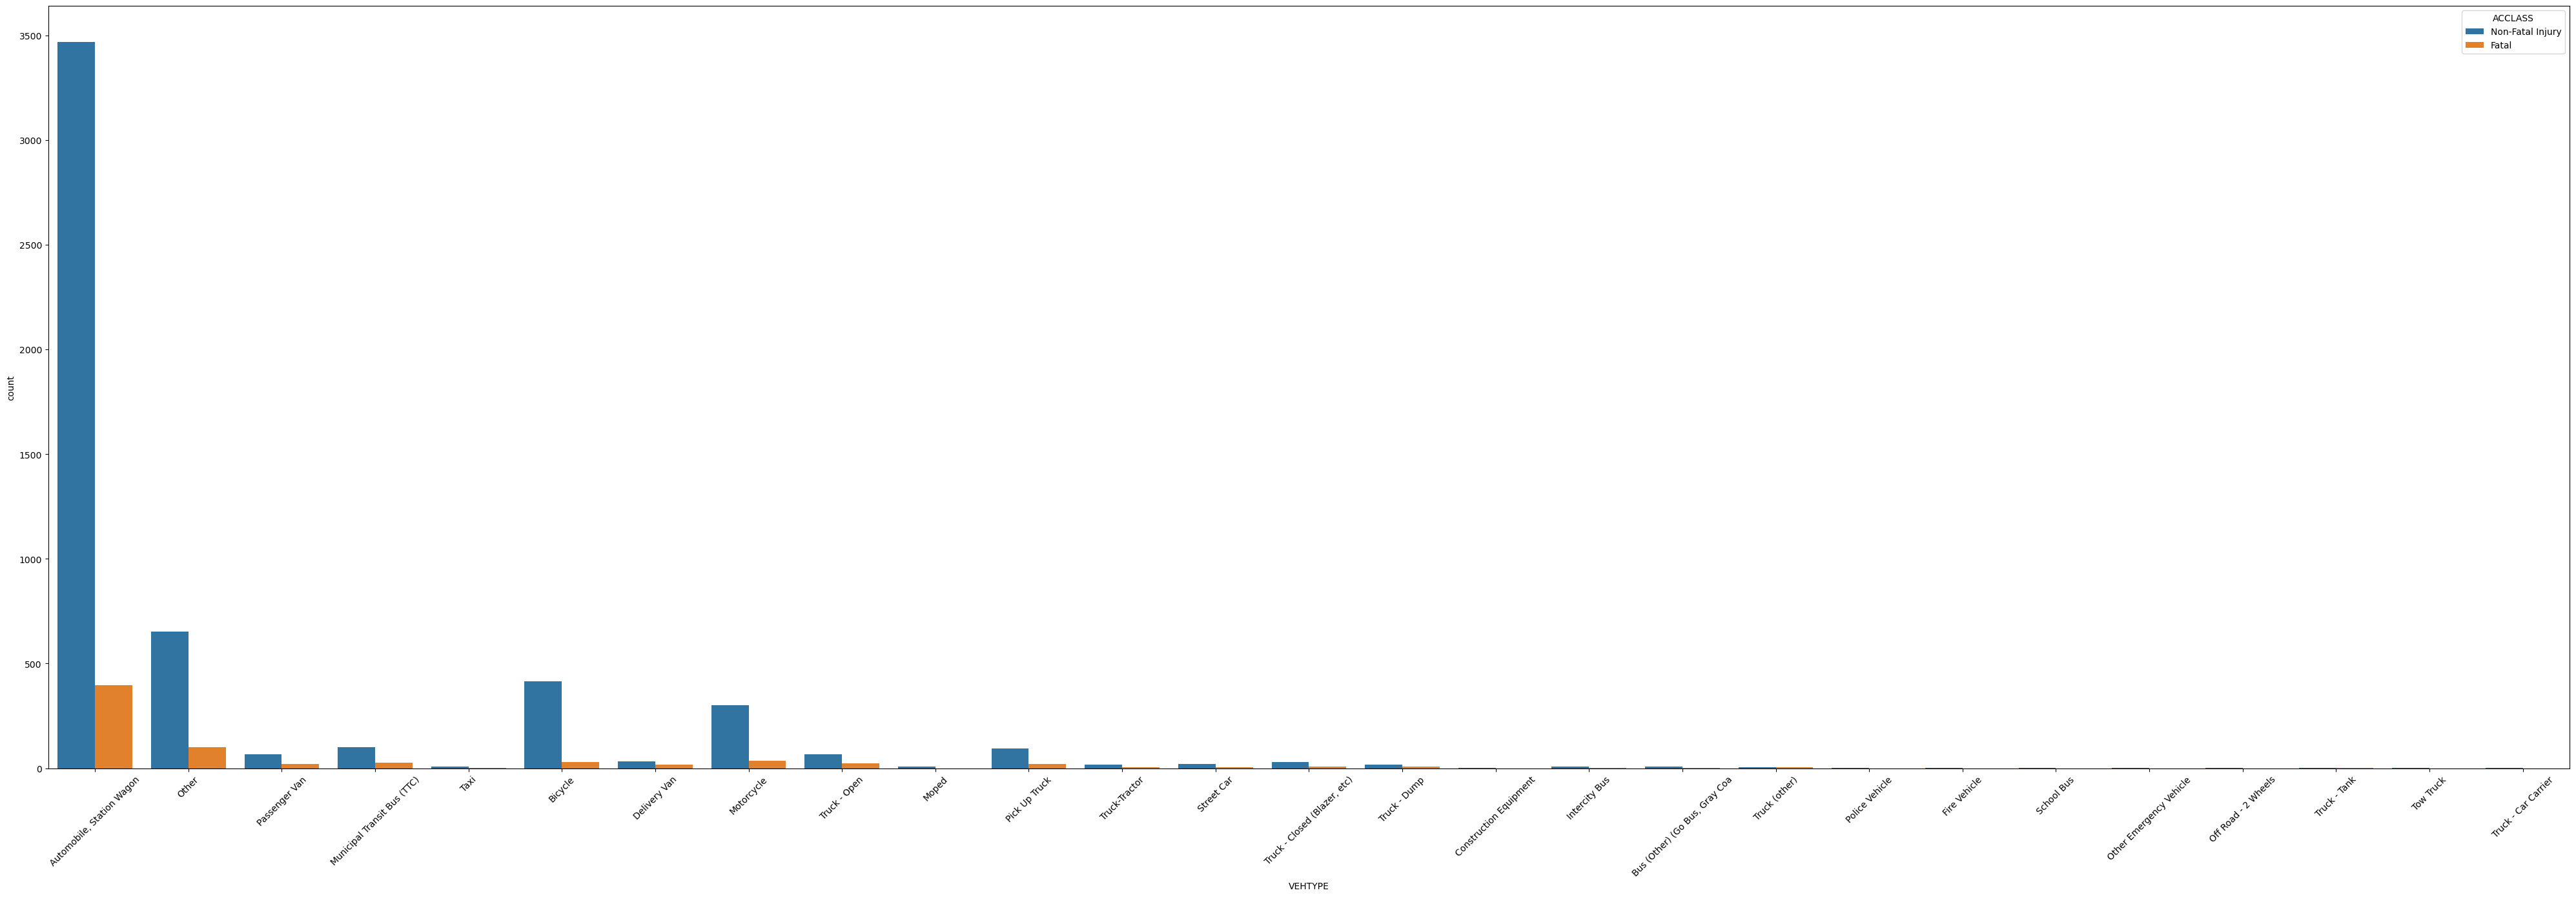

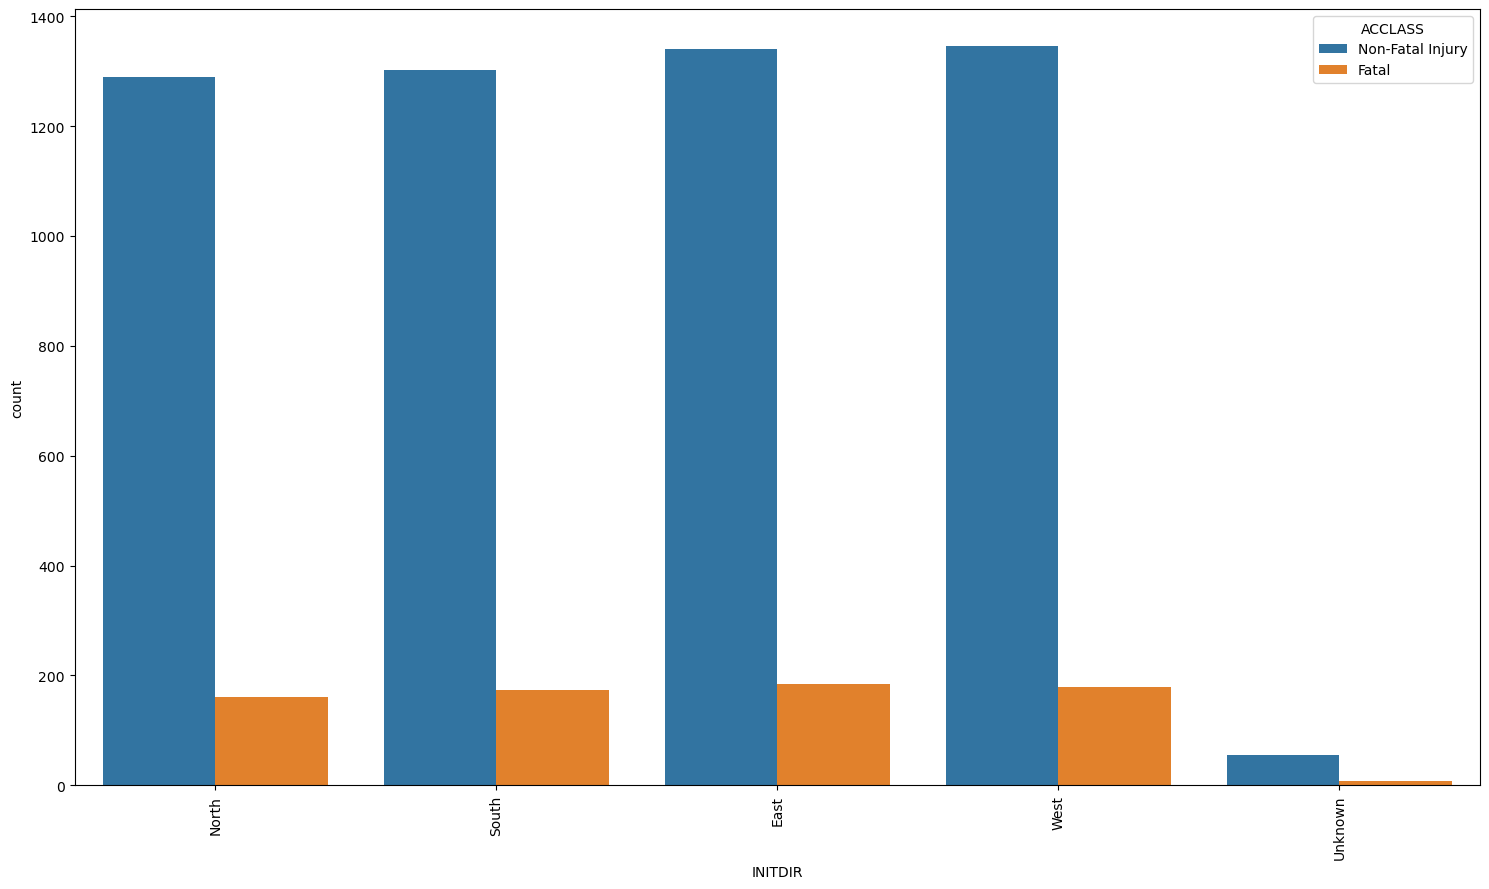

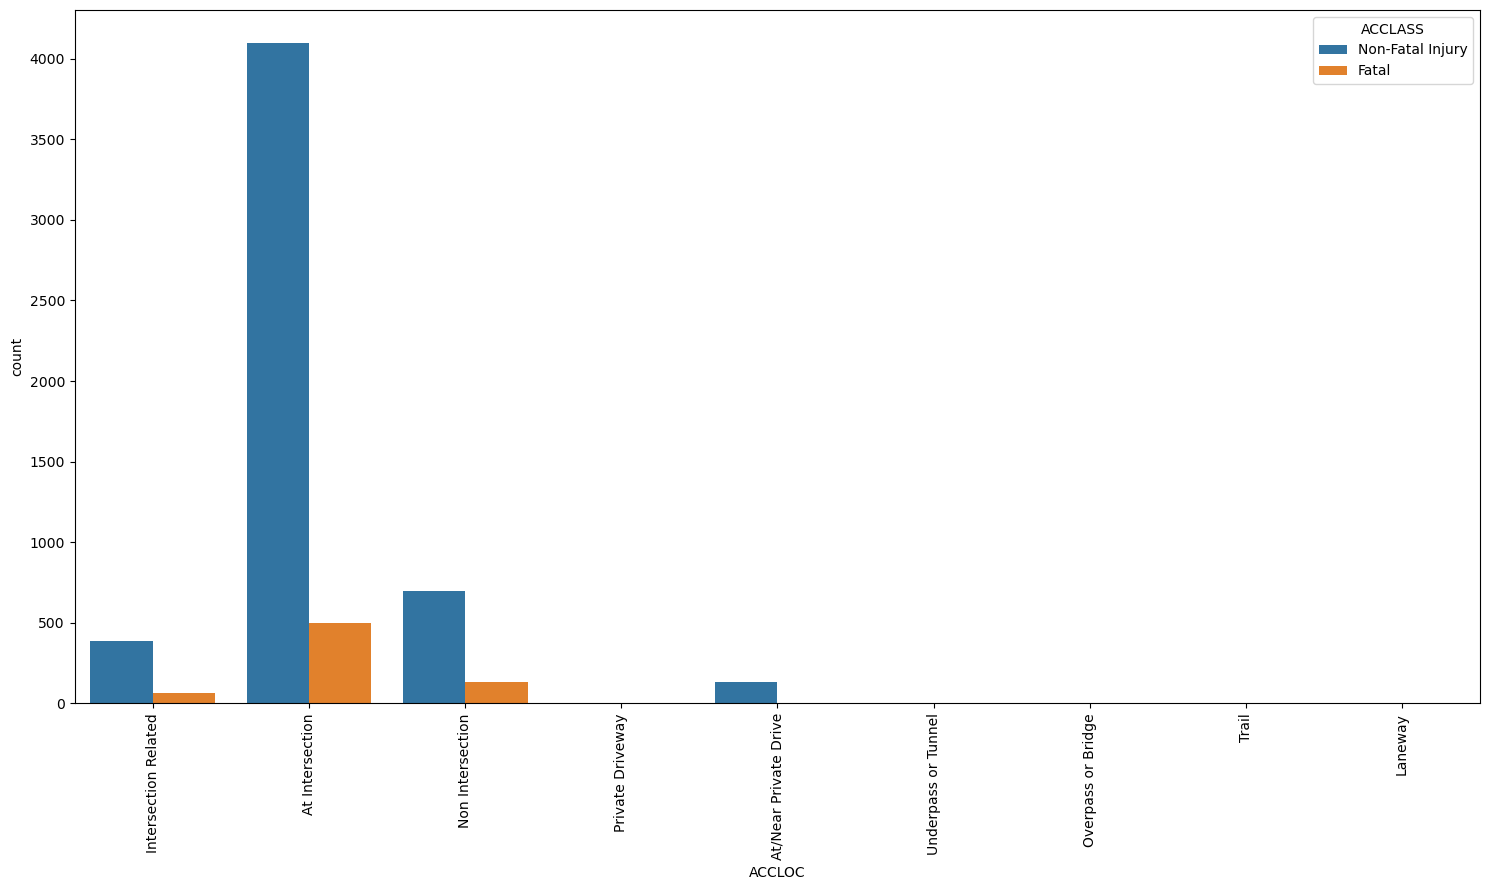

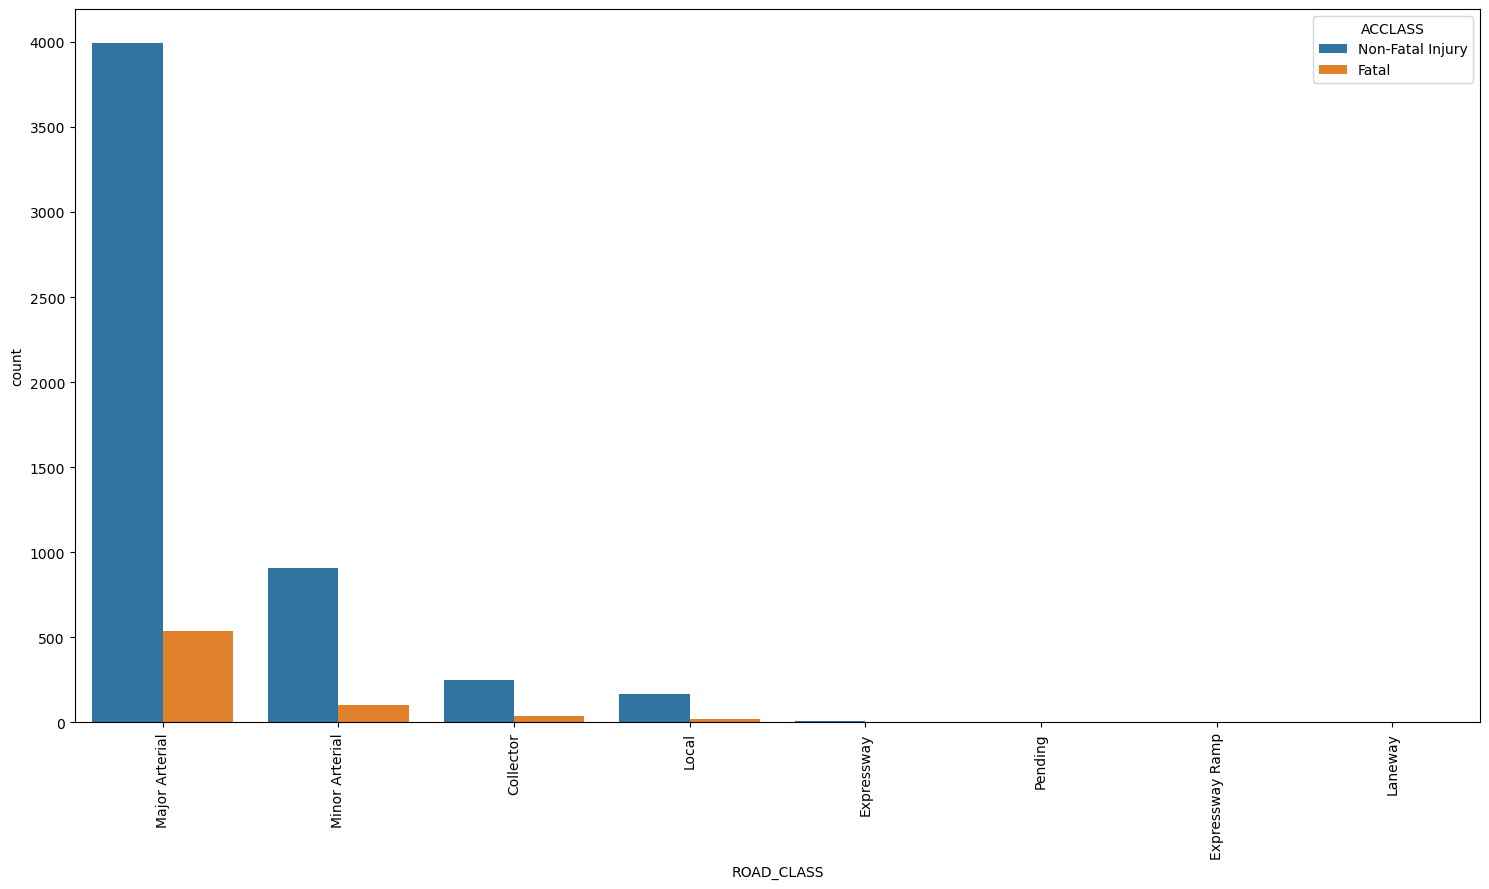

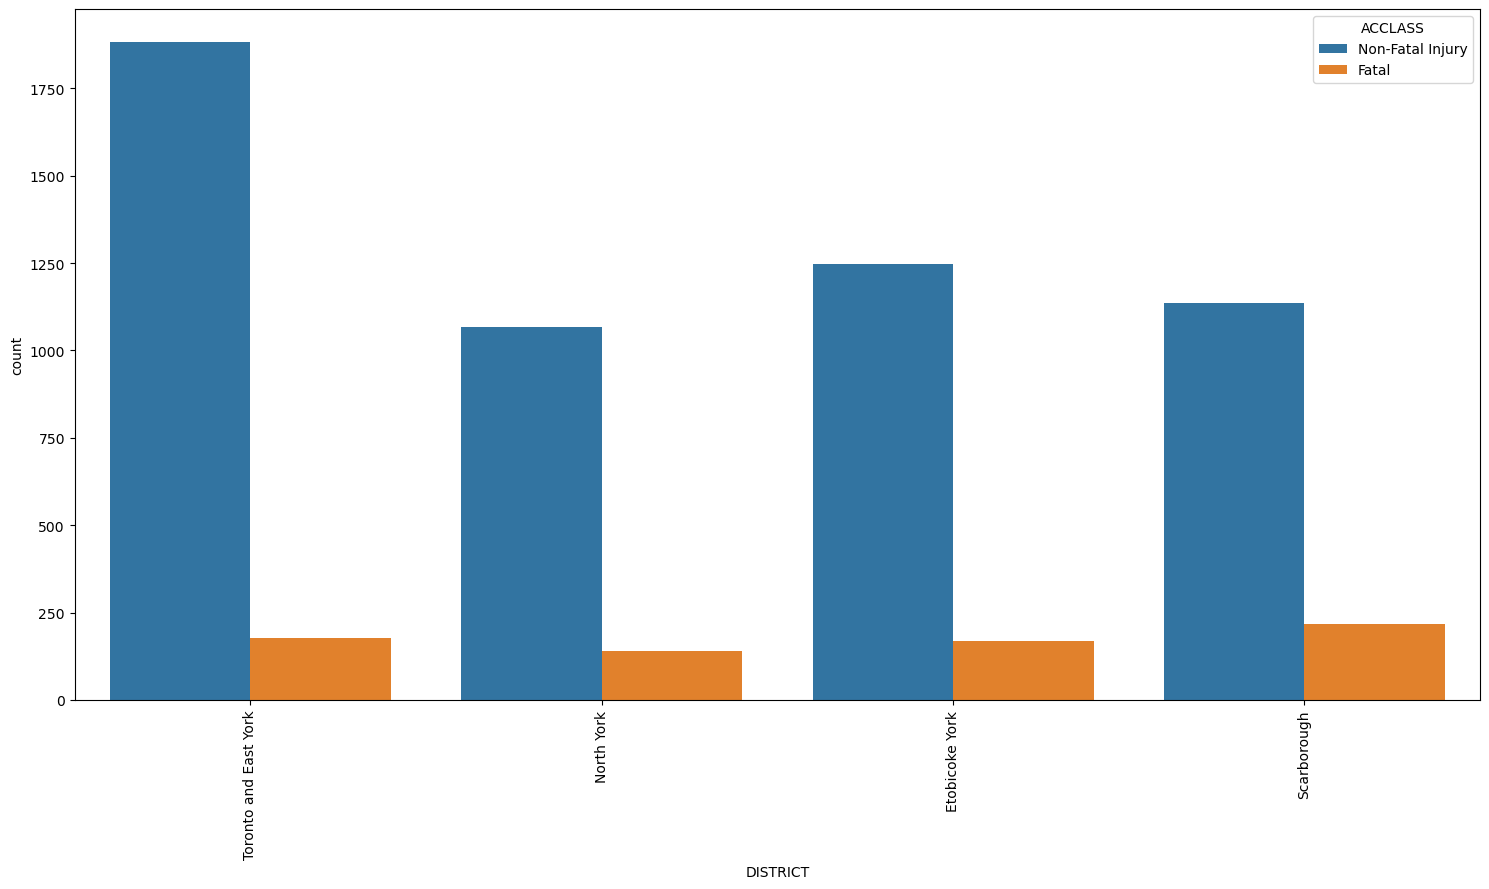

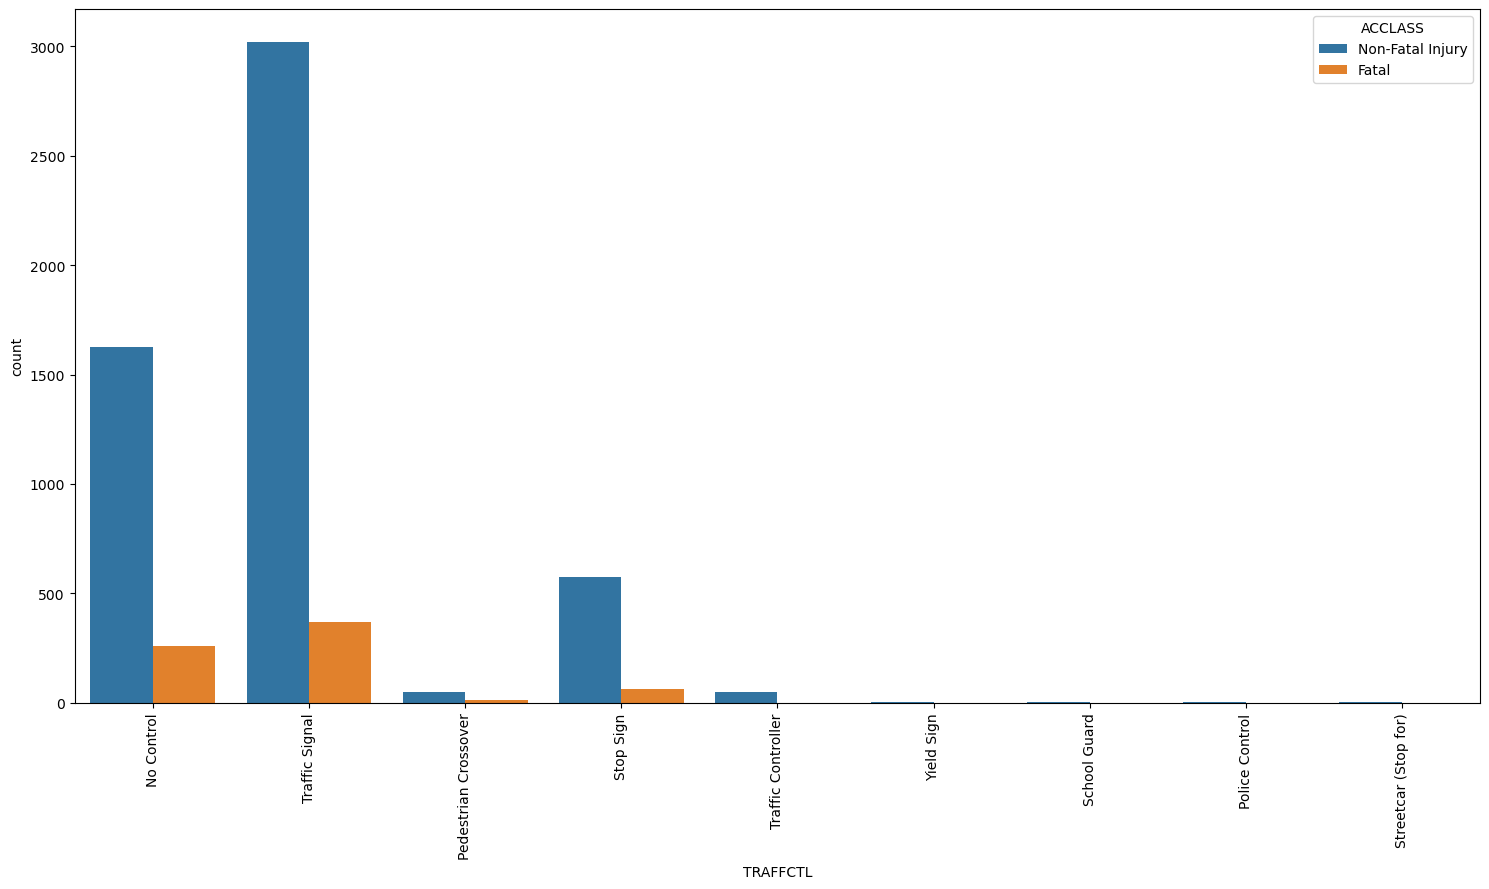

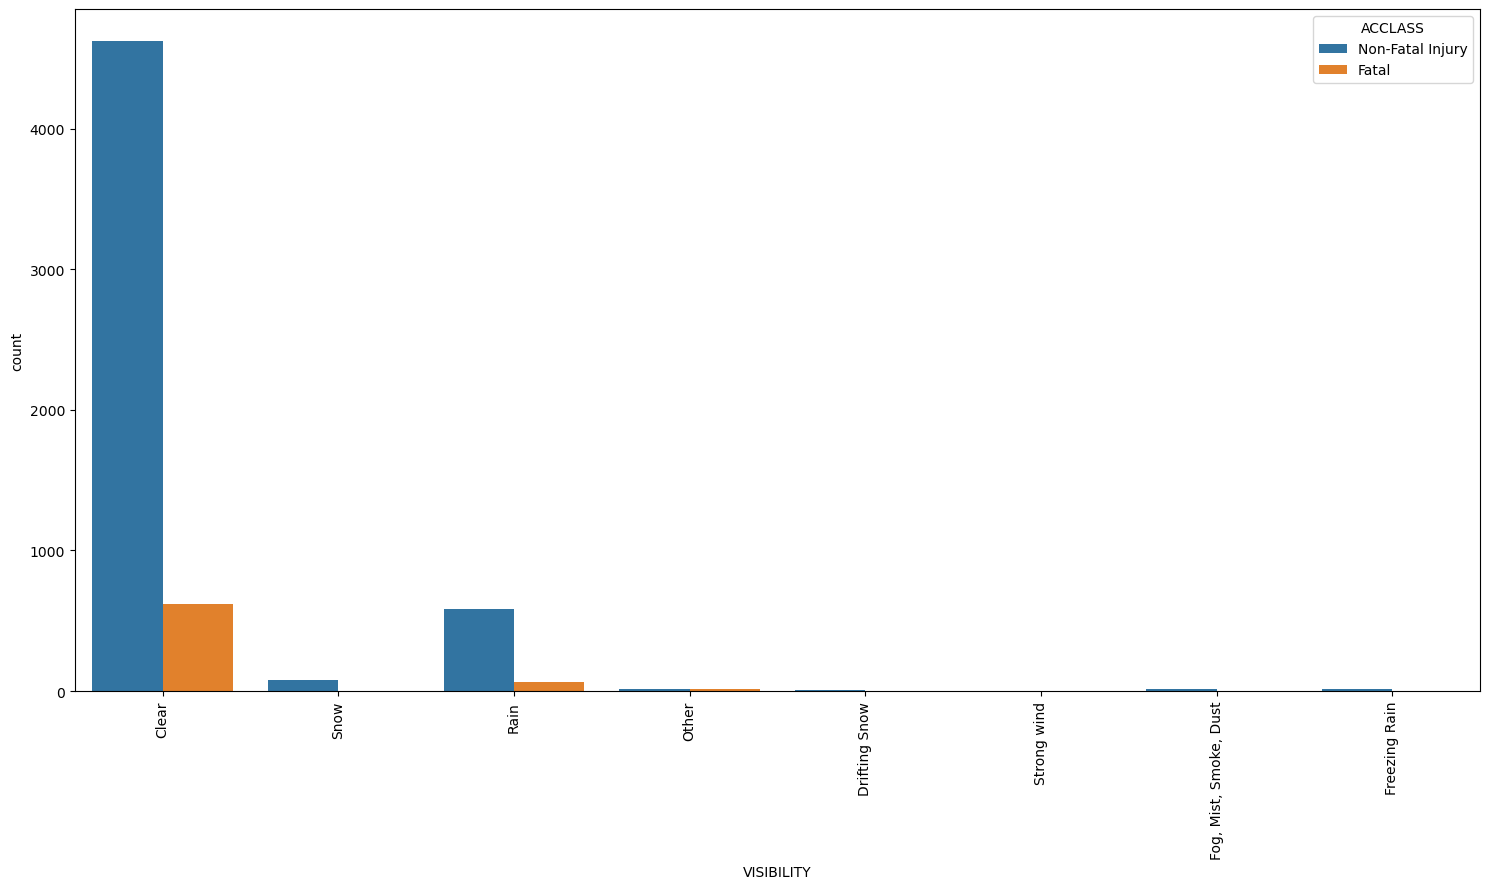

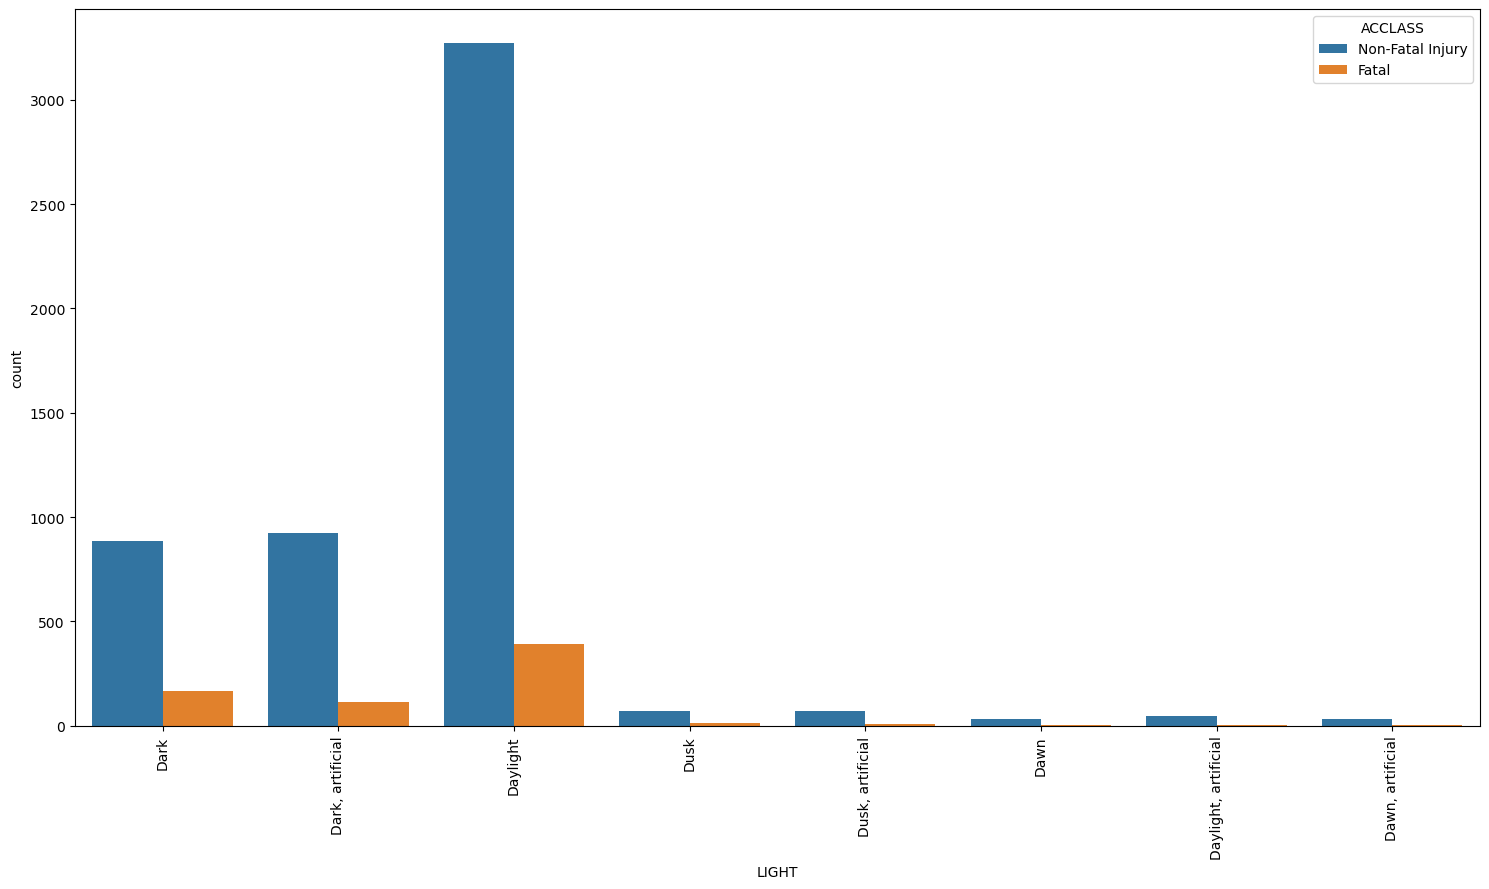

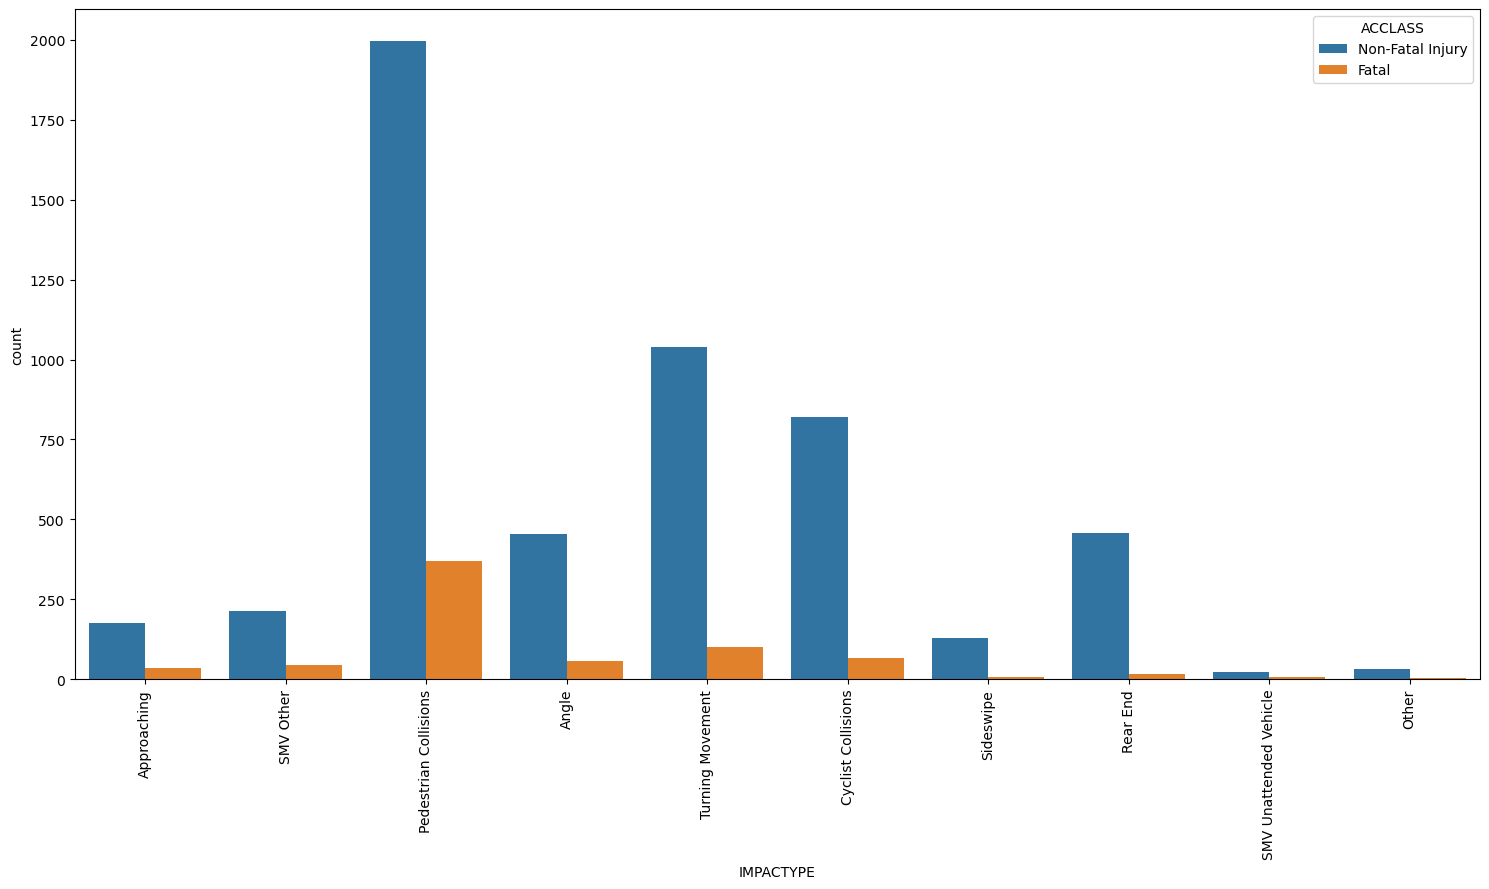

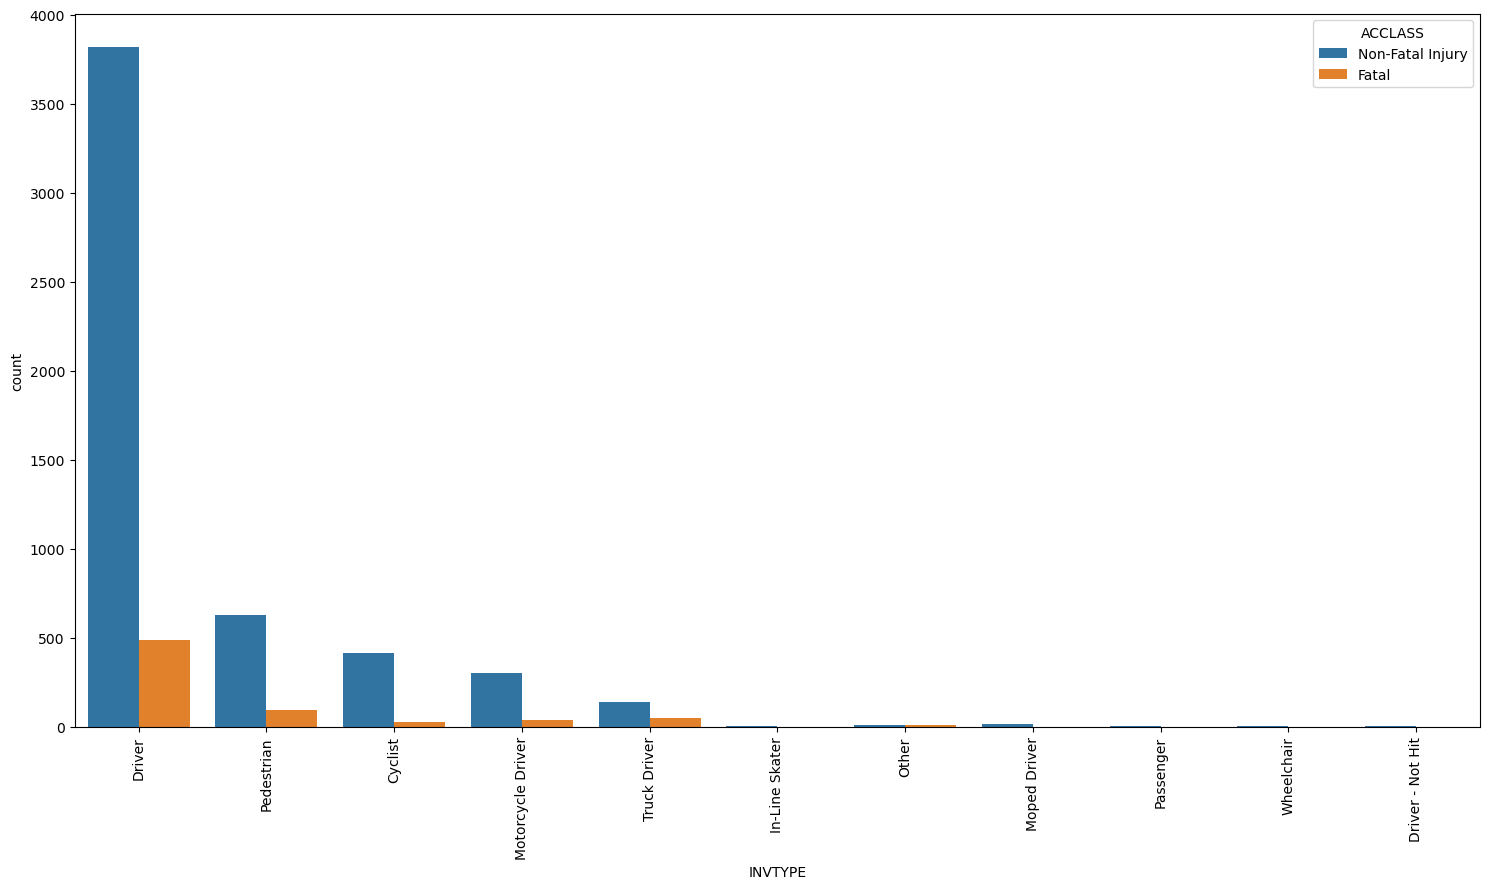

In [164]:
# create function for count plot for reducing length and improvrmrnt of understanding
def plot_countplot(x_col, figsize=(15,9), rotation=90):
    plt.figure(figsize=figsize)
    sns.countplot(x=x_col, hue='ACCLASS', data=df)
    plt.xlabel(x_col)
    plt.ylabel('count')
    plt.legend(title='ACCLASS')
    # rotating label of x-axis
    plt.xticks(rotation=rotation)
    # trying to adjust layout
    plt.tight_layout()
    plt.show()

#showing the relationship between ACCLASS and VEHTYPE with bar plot
plot_countplot('VEHTYPE', figsize=(40,14), rotation=45)

#showing the relationship between ACCLASS and INITDIR with bar plot
plot_countplot('INITDIR')

#showing the relationship between ACCLASS and ACCLOC with bar plot
plot_countplot('ACCLOC')

#showing the relationship between ACCLASS and ROAD_CLASS with bar plot
plot_countplot('ROAD_CLASS')

#showing the relationship between ACCLASS and DISTRICT with bar plot
plot_countplot('DISTRICT')

#showing the relationship between ACCLASS and TRAFFCTL with bar plot
plot_countplot('TRAFFCTL')

#showing the relationship between ACCLASS and VISIBILITY with bar plot
plot_countplot('VISIBILITY')

#showing the relationship between ACCLASS and LIGHT with bar plot
plot_countplot('LIGHT')

#showing the relationship between ACCLASS and IMPACTYPE with bar plot
plot_countplot('IMPACTYPE')

#showing the relationship between ACCLASS and INVTYPE with bar plot
plot_countplot('INVTYPE')


In [185]:
# visualize the distibution of invage by class
# created function for histplot
def histplot_fun(INVAGE):
    plt.figure(figsize=(15,9))
    sns.histplot(data=df, x=INVAGE, hue='ACCLASS', multiple='stack')
    plt.title(f"Distribution of {INVAGE} by ACCLASS")
    plt.xlabel(INVAGE)
    plt.ylabel('Count')
    plt.show()

C:\Users\vjp16\Downloads\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


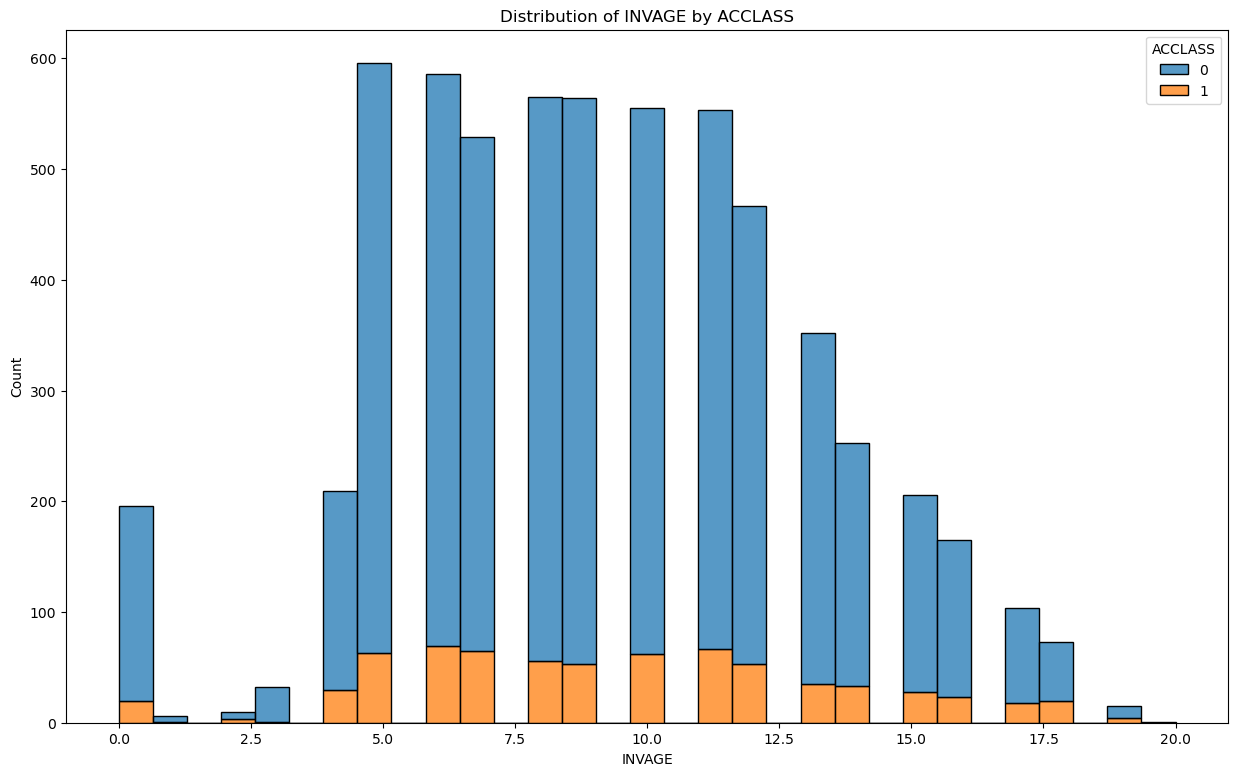

In [186]:
# use of upper function
histplot_fun('INVAGE')

C:\Users\vjp16\Downloads\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


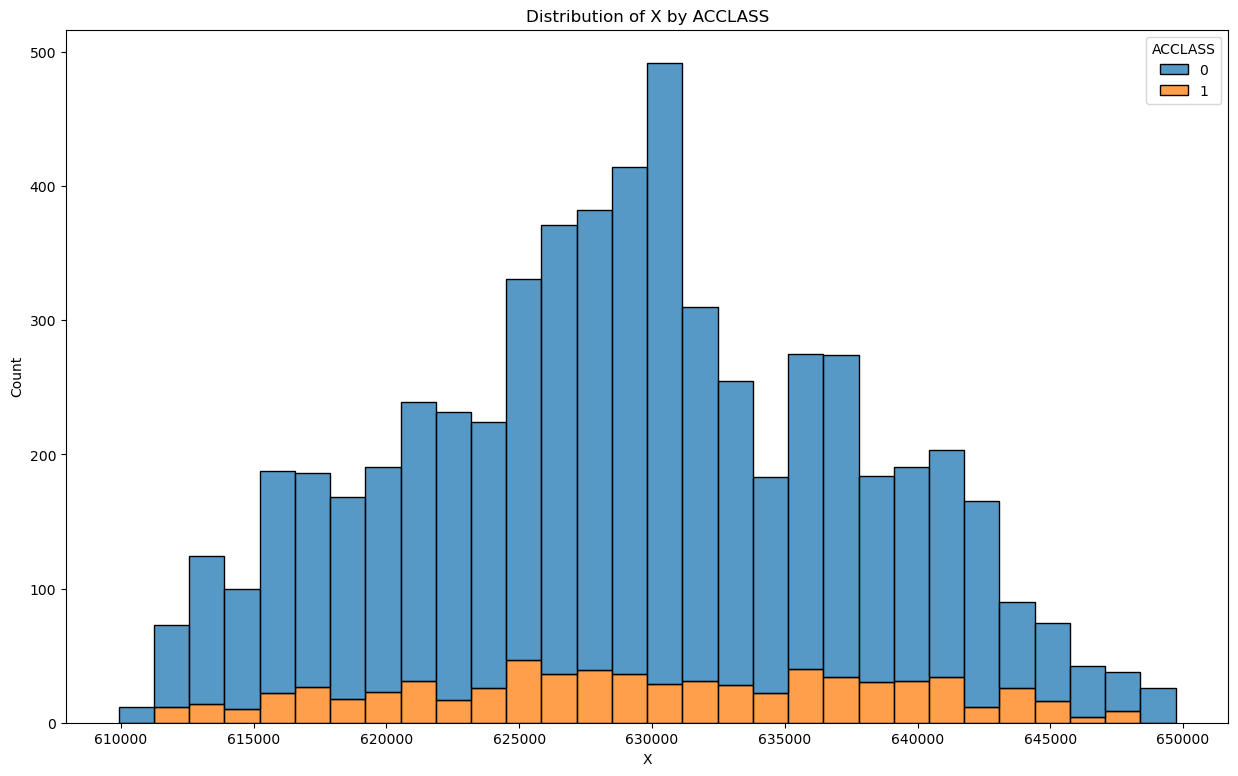

In [187]:
histplot_fun('X')

C:\Users\vjp16\Downloads\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


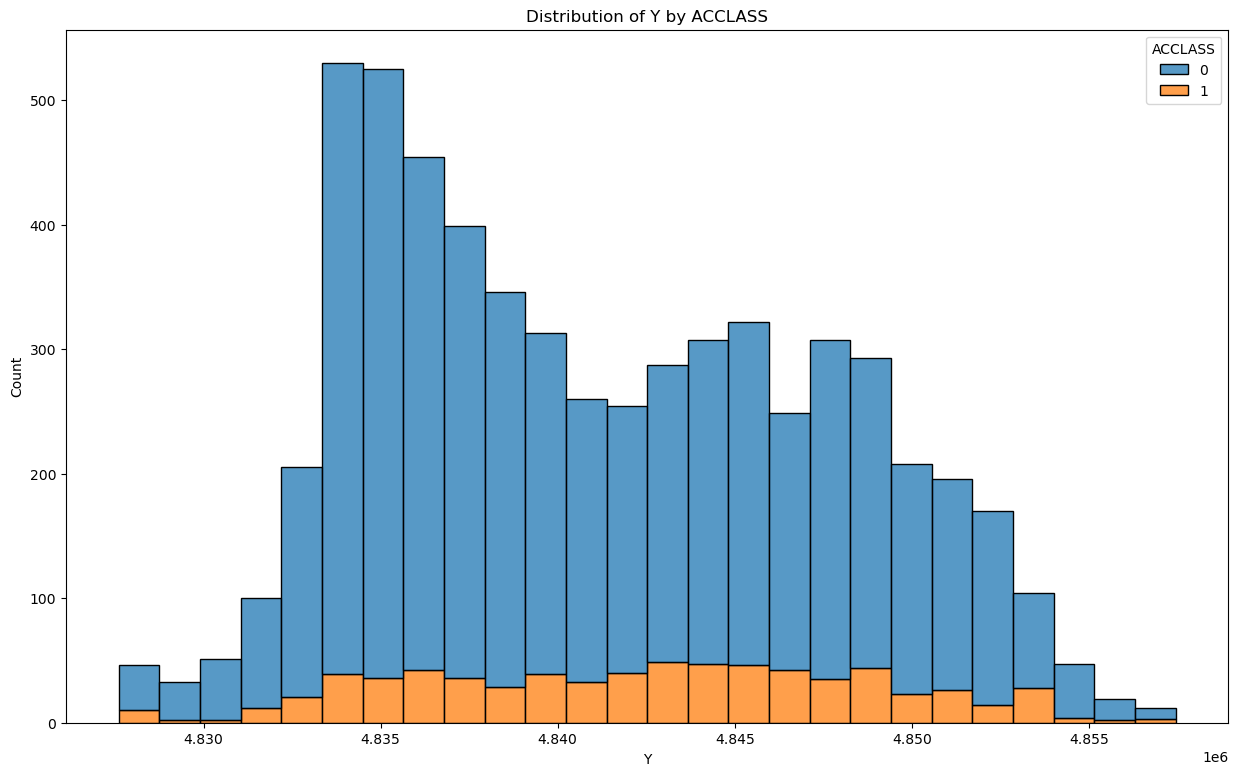

In [188]:
histplot_fun('Y')

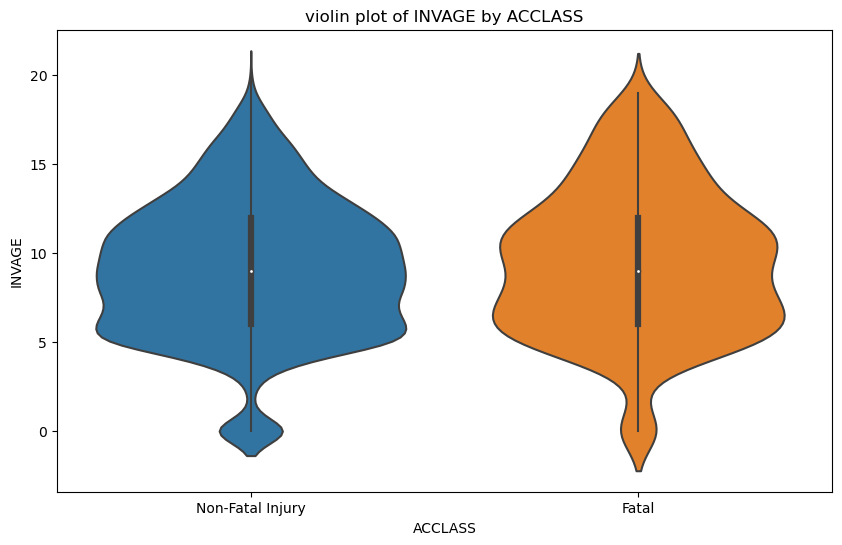

In [169]:
# violin plot for visualizing distribution of 'INVAGE' ACROSS DIFFERENT CATEGORIES OF ACCLASS
plt.figure(figsize=(10,6))
sns.violinplot(x='ACCLASS', y='INVAGE', data=df)
plt.title('violin plot of INVAGE by ACCLASS')
plt.xlabel('ACCLASS')
plt.ylabel('INVAGE')
plt.show()

making Mannual mapping in target feature so that we can use it in prediction (encoding) 

In [170]:
# now defining the maoing for library encoding
acclass_mapping = {
    'Non-Fatal Injury': 0,
    'Fatal': 1
}
# Apply the mapping
df['ACCLASS'] = df['ACCLASS'].map(acclass_mapping)

In [171]:
df.columns

Index(['VEHTYPE', 'INITDIR', 'ACCLOC', 'X', 'Y', 'ACCNUM', 'ROAD_CLASS',
       'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'IMPACTYPE', 'INVTYPE',
       'INVAGE', 'ACCLASS'],
      dtype='object')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6037 entries, 2 to 14999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VEHTYPE     6037 non-null   object 
 1   INITDIR     6037 non-null   object 
 2   ACCLOC      6037 non-null   object 
 3   X           6037 non-null   float64
 4   Y           6037 non-null   float64
 5   ACCNUM      6037 non-null   float64
 6   ROAD_CLASS  6037 non-null   object 
 7   DISTRICT    6037 non-null   object 
 8   TRAFFCTL    6037 non-null   object 
 9   VISIBILITY  6037 non-null   object 
 10  LIGHT       6037 non-null   object 
 11  IMPACTYPE   6037 non-null   object 
 12  INVTYPE     6037 non-null   object 
 13  INVAGE      6037 non-null   int64  
 14  ACCLASS     6037 non-null   int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 754.6+ KB


In [173]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VEHTYPE     2525 non-null   object 
 1   INITDIR     3177 non-null   object 
 2   ACCLOC      3950 non-null   object 
 3   X           3956 non-null   float64
 4   Y           3956 non-null   float64
 5   ACCNUM      3956 non-null   float64
 6   ROAD_CLASS  3827 non-null   object 
 7   DISTRICT    3743 non-null   object 
 8   TRAFFCTL    3910 non-null   object 
 9   VISIBILITY  3946 non-null   object 
 10  LIGHT       3952 non-null   object 
 11  IMPACTYPE   3929 non-null   object 
 12  INVTYPE     3950 non-null   object 
 13  INVAGE      3956 non-null   int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 432.8+ KB


In [174]:
X_test_new.columns

Index(['VEHTYPE', 'INITDIR', 'ACCLOC', 'X', 'Y', 'ACCNUM', 'ROAD_CLASS',
       'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'IMPACTYPE', 'INVTYPE',
       'INVAGE'],
      dtype='object')

In [175]:
print(df['ACCLASS'].isna().sum())

0


In [176]:
# create class and object for classification models 

class SupervisedMLModels:
    # defining function for preprocessing,hyper parameter tuning
    def __init__(self,df):
        self.df=df
        self.categorical_columns=['VEHTYPE','INITDIR','ACCLOC','ROAD_CLASS','DISTRICT',"TRAFFCTL","VISIBILITY",'LIGHT',"IMPACTYPE",'INVTYPE','INVAGE']
        self.preprocessor=ColumnTransformer(
            transformers= [
                ('cat',OneHotEncoder( handle_unknown='ignore'), self.categorical_columns)
            ],
            remainder='passthrough' # keeps the other coulmn remain in their state
        )# preprocessing the colums which categorical
        #making dictionary for models
        self.models={
            'RandomForest':RandomForestClassifier(random_state=42),
            'GradientBoosting':GradientBoostingClassifier(random_state=42),
            'SVM':SVC(probability=True,random_state=42),
            'LogisticRegression':LogisticRegression(random_state=42)
        }
        self.param_grids={# define parameters for all model
            'RandomForest':{
                'n_estimators':[100,200,300],
                'max_depth':[10,20,30,None],
                'min_samples_split':[2,5,10],
                'min_samples_leaf':[1,2,4]
            },# for gradient boosting model
            'GradientBoosting':{
                'n_estimators':[100,200,300],
                'learning_rate':[0.01,0.1,0.2],
                'max_depth':[3,4,5]
            },# for SVM model
            'SVM':{
                'C':[0.1,1,10],
                'gamma':['scale',0.1,1,10],
                'kernel':['rbf']
            },# for logistic regression model
            'LogisticRegression':{
                'C':[0.1,1,10],
                'solver':['liblinear','saga']
            }
        }
        self.best_models={}# empty dictinary to store values of best model
        # function for spliting the dataset into train and test
    def split_data(self,test_size=0.2,random_state=42):
        X=self.df.drop(columns='ACCLASS')
        y=self.df['ACCLASS']
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.preprocessor.fit_transform(X),y,test_size=test_size,random_state=random_state)
        # function to train and evaluate each model 
    def train_and_evaluate(self):
        results={}# dictionary to store results of each model evaluations
        for name,model in self.models.items():# for loop to evalute and tarin each model
            print(f'training{name}....')
            grid_search=GridSearchCV(estimator=model,param_grid=self.param_grids[name],cv=3,n_jobs=-1,verbose=2)
            grid_search.fit(self.X_train,self.y_train)
            best_model=grid_search.best_estimator_
            self.best_models[name]=best_model
                # doing model prediction 
            y_pred=best_model.predict(self.X_test)
                # accuracy score for the models
            accuracy=accuracy_score(self.y_test,y_pred)
            print(f'{name}Accuacy after tuning parmaeter is:{accuracy:.2f}')
                
                # classification report for the model
            class_report=classification_report(self.y_test,y_pred,zero_division=0)
                #printing the report
            print(f'{name}Classification Report for model is :\n{class_report}')

                # confusion matrix for the model
            conf_matrix=confusion_matrix(self.y_test,y_pred)
                # printing the confusion matrix
            print(f"confusion matrix for {name} is:\n{conf_matrix}")

                #checking for gradient boosting for roc curve and auc score
            if name=='GradientBoosting':
                y_prob= best_model.predict_proba(self.X_test)[:,1]
                fpr,tpr,_=roc_curve(self.y_test,y_prob)
                auc_score=auc(fpr,tpr)
                    # printing the auc score for the model
                print(f"Auc score {name} is :{auc_score:.2f}")
                # tranfering value of accuracy to results
            results[name]=accuracy
        return results
    def predict_and_save(self,X_test_new,object_id_col,ouput_file_prefix='submission'):
             # exit of for loop
            # returning the results 
 
        # defining a method for prediction and sacing them in dictionary
        # variable to stoe information after tranformation
        X_test_new_processsed=self.preprocessor.transform(X_test_new)
            # creating empty dictionary to store prediction results
        predictions={}
            # using for loop to predict and store the prediction
        for name,model in self.best_models.items():
            y_pred=model.predict(X_test_new_processsed)
            predictions[name]=y_pred

                # creating dataframe ewith the objectid and predicted ACClass
            y_pred_final_df=pd.DataFrame({'OBJECTID':object_id_col,'ACCLASS':y_pred})
                # applying mapping to convert the binary classification in them to lables(reverse mapping)
            acclass_mapping_rev={0:'Non-Fatal Injury',1:'Fatal'}
            y_pred_final_df['ACCLASS']=y_pred_final_df['ACCLASS'].map(acclass_mapping_rev)

                # saving the outputs to csv file
            output_file=f'{ouput_file_prefix}_{name}.csv'
            y_pred_final_df.to_csv(output_file,index=False)
                #printing that csv file created succesfully
            print(f'submssion of file for{name} is created succesfully :{output_file}')
            #end of for loop and end of this function
        # creating plots for the roc and other outputs
    def plot_roc_curve(self):
        plt.figure(figsize=(12,8))
            #using for loop in order make the plot
        for name,model in self.best_models.items():
                # using if condition in order to distinguish for SVM model
            if hasattr(model,'predict_proba'):
                y_prob=model.predict_proba(self.X_test)[:,1]
            else: # for SVM MODEL
                y_prob=model.decision_function(self.X_test)
                # storing value roc into variables
            fpr,tpr,_=roc_curve(self.y_test,y_prob)
                # storing value of auc in variable
            auc_score=auc(fpr,tpr)
            plt.plot(fpr,tpr,label=f'{name} (AUC={auc_score:.2f})')
        plt.plot([0,1],[0,1],"k--")
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.05])
            # labeling the x and y axis
        plt.xlabel("false positive rates")
        plt.ylabel("true positive rates")
            # making the title for plot
        plt.title("characterics for reciver operations")
        plt.legend(loc="lower right")
        plt.show()
        # making function to plot  the training validation curves of model
    def plot_training_validation_curve(self,model_name):
        model=self.best_models[model_name]#adding best model name to variable
        # ploting the curves of training and validations
        train_sizes,train_scores,validation_scores=learning_curve(
            model,self.X_train,self.y_train,cv=3,n_jobs=-1,train_sizes=np.linspace(0.1,1.0,10)
        )
         # ploting the values 
        plt.figure(figsize=(12,6))
        plt.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='training scores')
        plt.plot(train_sizes,np.mean(validation_scores,axis=1),'o-',color='g',label='validation scores')
            #making labels for x and y axis
        plt.xlabel("size of training")
        plt.ylabel("scores")
            #title of plot
        plt.title(f"training and validation curves of{model_name}")
        plt.legend(loc='best')
        plt.show()
    


In [177]:
# intialization of object of class
model_manager=SupervisedMLModels(df)
# split the data into train and test subsets
model_manager.split_data()

In [178]:
# training all the models and evaluate perfoemance of each model and storing their rsesults into variable 
results=model_manager.train_and_evaluate()


trainingRandomForest....
Fitting 3 folds for each of 108 candidates, totalling 324 fits
RandomForestAccuacy after tuning parmaeter is:0.91
RandomForestClassification Report for model is :
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1091
           1       0.89      0.07      0.13       117

    accuracy                           0.91      1208
   macro avg       0.90      0.53      0.54      1208
weighted avg       0.91      0.91      0.87      1208

confusion matrix for RandomForest is:
[[1090    1]
 [ 109    8]]
trainingGradientBoosting....
Fitting 3 folds for each of 27 candidates, totalling 81 fits
GradientBoostingAccuacy after tuning parmaeter is:0.93
GradientBoostingClassification Report for model is :
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1091
           1       0.77      0.45      0.57       117

    accuracy                           0.93      1208
   m

In [179]:
# tranfering value of object id to a variable
object_id_col = object_id_col['OBJECTID'] 

In [180]:
#calling the function of class to predict and save the values of prediction
model_manager.predict_and_save(X_test_new,object_id_col)

submssion of file forRandomForest is created succesfully :submission_RandomForest.csv
submssion of file forGradientBoosting is created succesfully :submission_GradientBoosting.csv
submssion of file forSVM is created succesfully :submission_SVM.csv
submssion of file forLogisticRegression is created succesfully :submission_LogisticRegression.csv


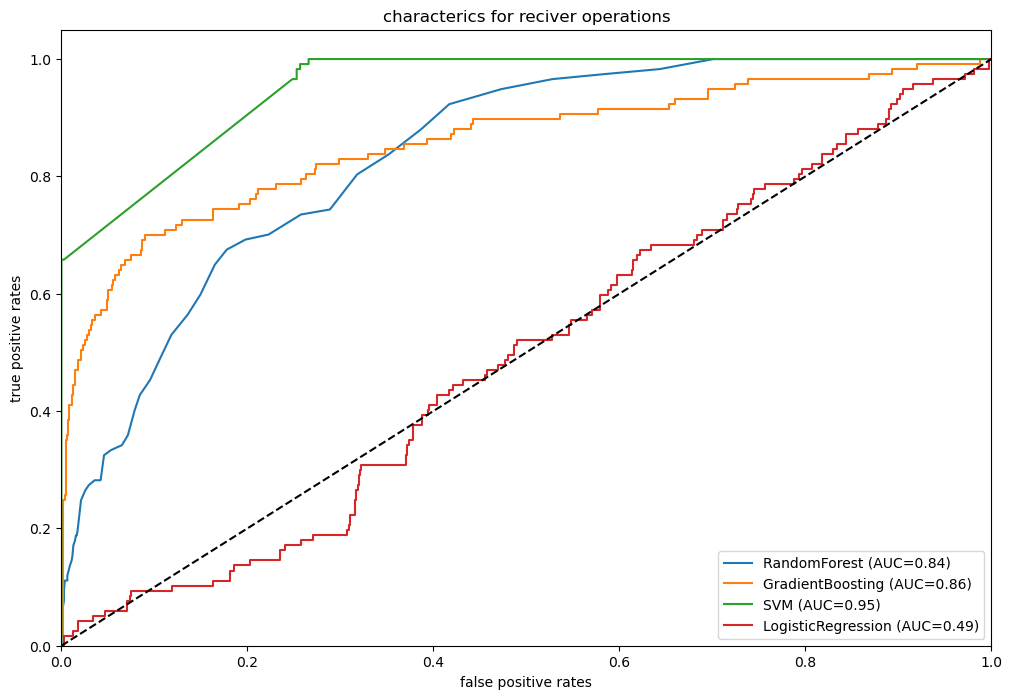

In [181]:
# calling function to plot the curves of the models(roc) 
model_manager.plot_roc_curve()

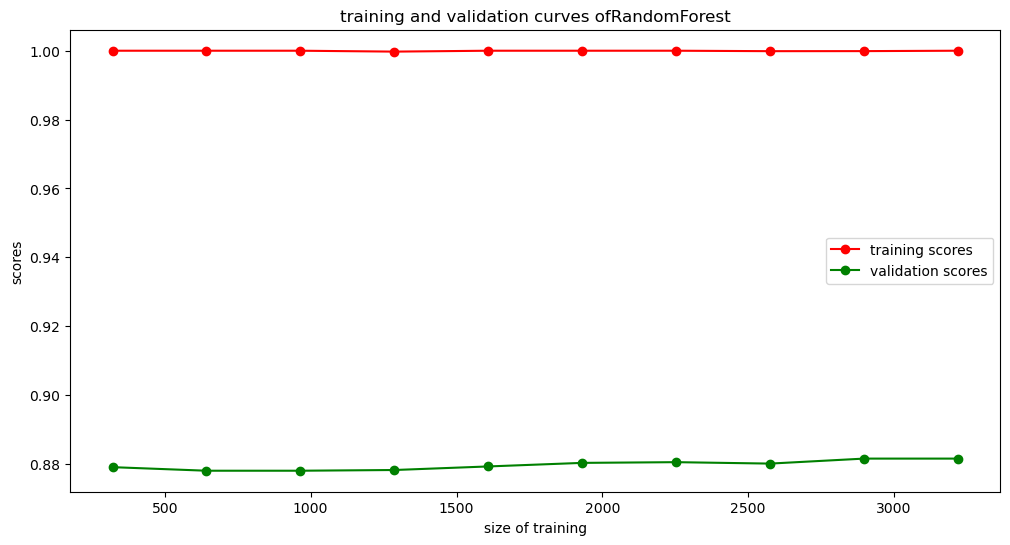

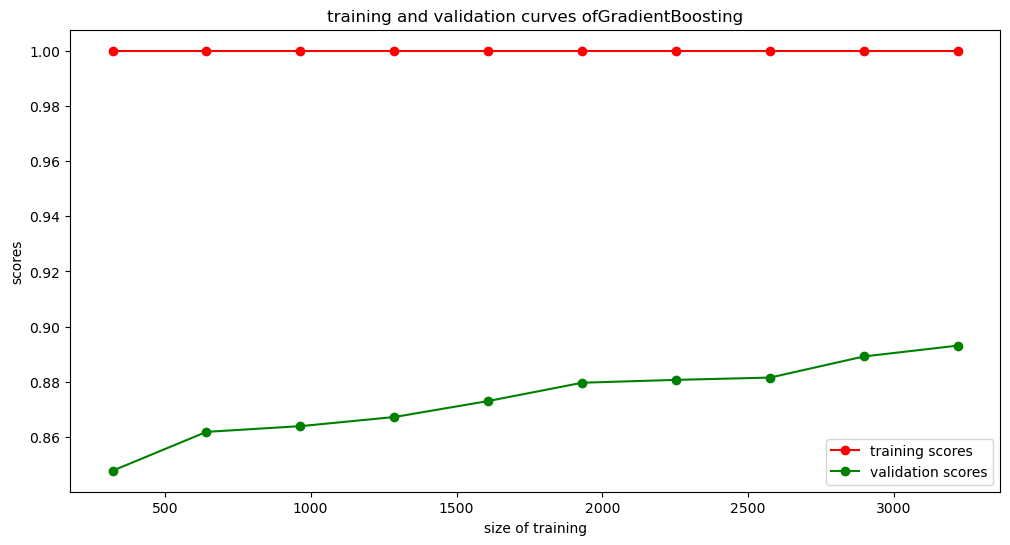

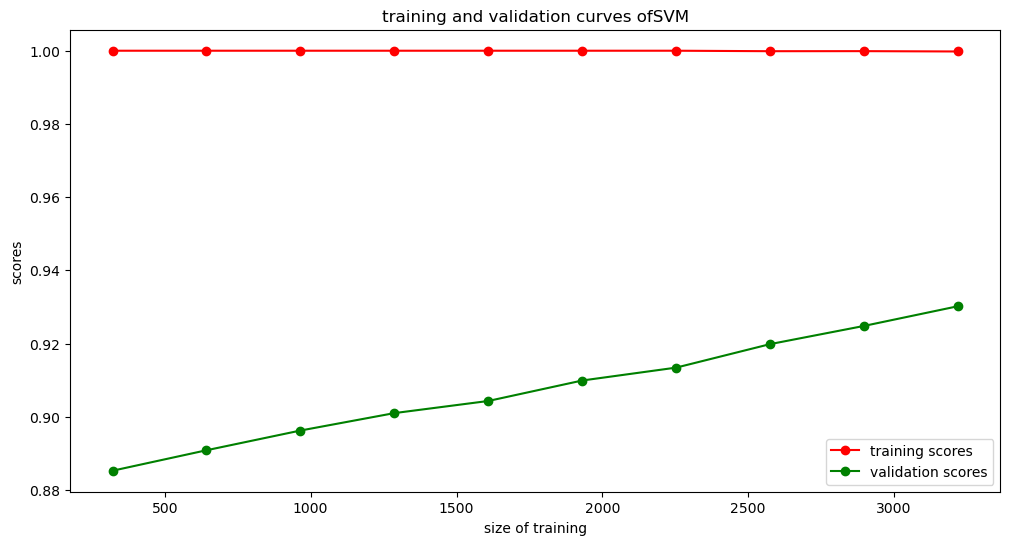

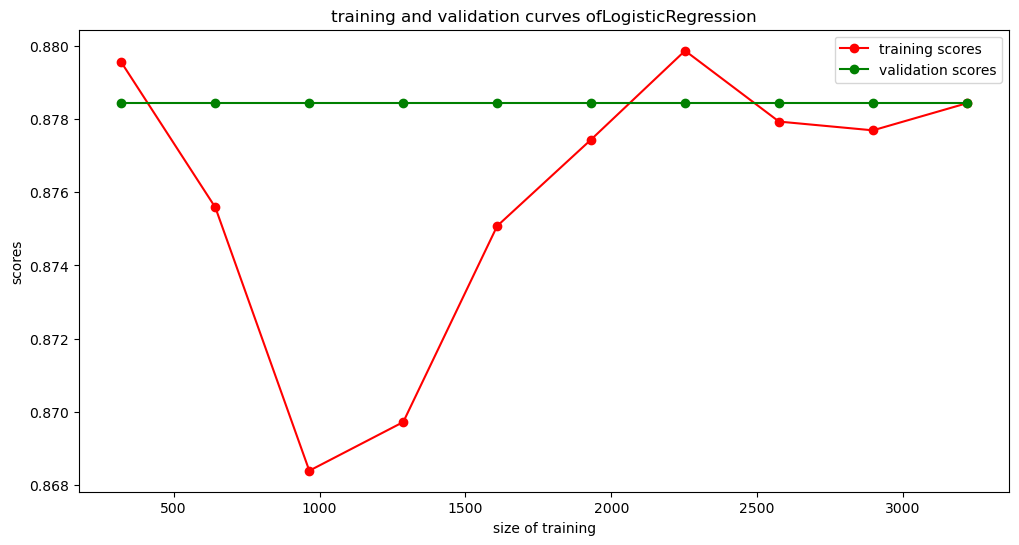

In [184]:
# ploting the testing and traing curve of models using function in class
model_manager.plot_training_validation_curve("RandomForest")
model_manager.plot_training_validation_curve("GradientBoosting")
model_manager.plot_training_validation_curve("SVM")
model_manager.plot_training_validation_curve("LogisticRegression")
